In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [26]:
df = pd.read_csv("data.csv")
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [28]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [29]:
df=df.drop(['Engine Fuel Type','Market Category','Vehicle Style','Popularity','Number of Doors','Vehicle Size'],axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [30]:
df = df.rename(columns = {"Engine HP":"HP","Engine Cylinders":"Cylinders","Transmission Type":"Transmission","Driven_Wheels":"Drive Mode","highway MPG":"MPG-H","city mpg":"MPG-C","MSRP":"Price"})
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [31]:
duplicates = df[df.duplicated()]
df = df.drop_duplicates()
print("Number of duplicate rows",duplicates)

Number of duplicate rows          Make     Model  Year     HP  Cylinders Transmission  \
14        BMW  1 Series  2013  230.0        6.0       MANUAL   
18       Audi       100  1992  172.0        6.0       MANUAL   
20       Audi       100  1992  172.0        6.0       MANUAL   
24       Audi       100  1993  172.0        6.0       MANUAL   
25       Audi       100  1993  172.0        6.0       MANUAL   
...       ...       ...   ...    ...        ...          ...   
11481  Suzuki      X-90  1998   95.0        4.0       MANUAL   
11603   Volvo      XC60  2017  302.0        4.0    AUTOMATIC   
11604   Volvo      XC60  2017  240.0        4.0    AUTOMATIC   
11708  Suzuki       XL7  2008  252.0        6.0    AUTOMATIC   
11717  Suzuki       XL7  2008  252.0        6.0    AUTOMATIC   

              Drive Mode  MPG-H  MPG-C  Price  
14      rear wheel drive     28     19  31500  
18     front wheel drive     24     17   2000  
20     front wheel drive     24     17   2000  
24     front w

In [32]:
df.count()

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG-H           10925
MPG-C           10925
Price           10925
dtype: int64

In [33]:
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


In [34]:
df=df.dropna()
print(df.isnull().sum())


Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64


In [35]:
df.count()

Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-H           10827
MPG-C           10827
Price           10827
dtype: int64

In [ ]:
Q1 = df[['Price']].quantile(0.25)
Q3 = df[['Price']].quantile(0.75)
IQR = Q3-Q1
print(IQR)

Price    21327.5
dtype: float64


<Axes: xlabel='Price'>

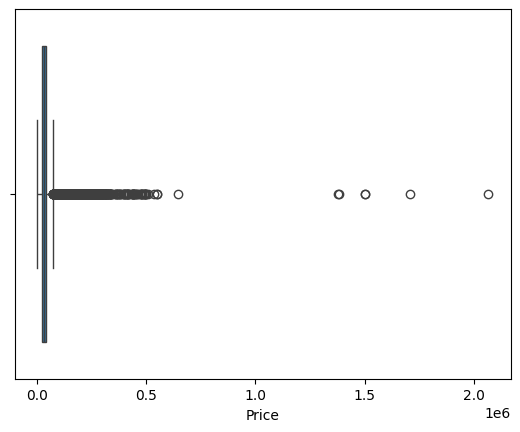

In [38]:
sns.boxplot(x=df['Price'])

Text(0.5, 0, 'Make')

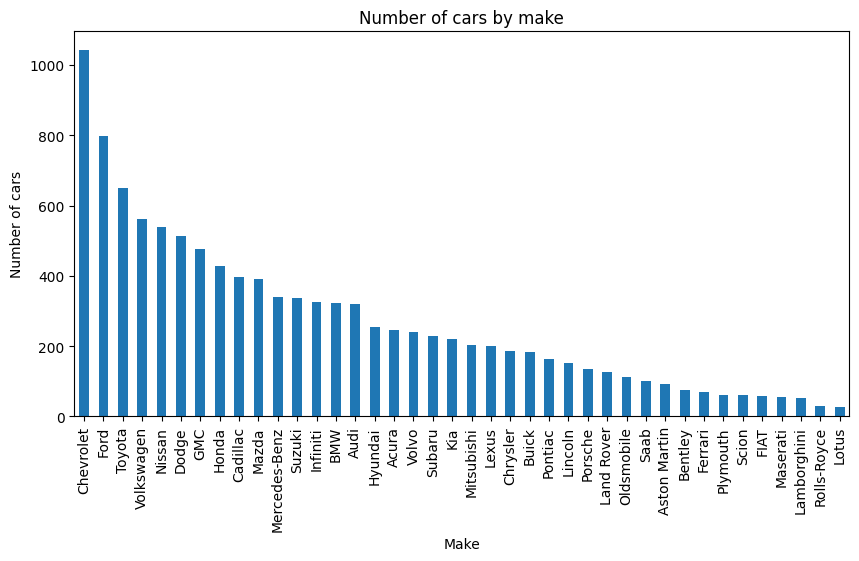

In [39]:
df.Make.value_counts().nlargest(40).plot(kind='bar',figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel("Number of cars")
plt.xlabel('Make')

<Axes: >

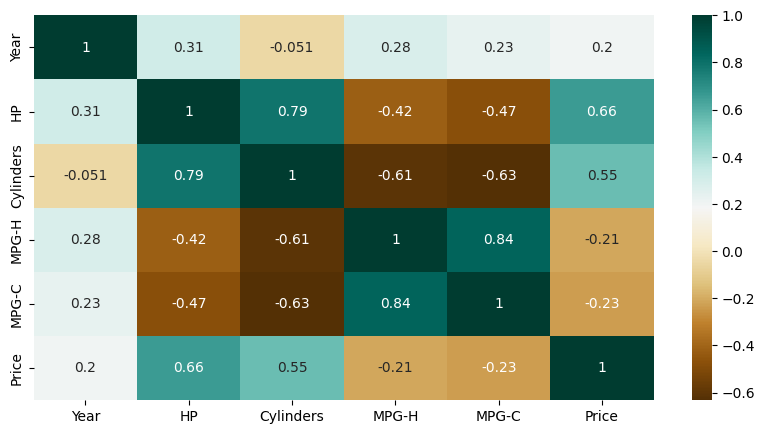

In [43]:

df.head(5)
plt.figure(figsize=(10,5))
df=df.select_dtypes(include='number')
c=df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)


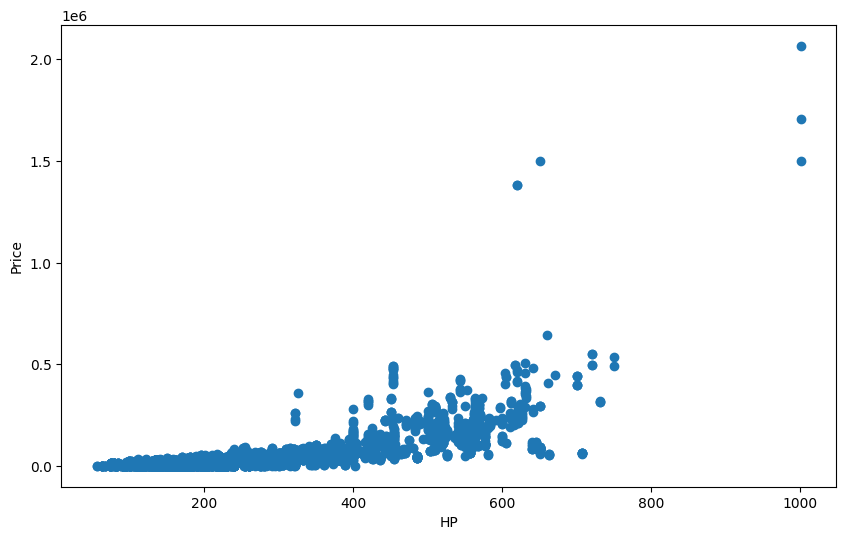

In [46]:
fig,ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'],df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()